# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [87]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [88]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50): # i mod 50
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | holualoa
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | fale old settlement
Processing Record 4 of Set 1 | vadso
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | bangassou
Processing Record 8 of Set 1 | howrah
Processing Record 9 of Set 1 | placido de castro
Processing Record 10 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | muli
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | puerto baquerizo moreno
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1

Processing Record 37 of Set 4 | leua
Processing Record 38 of Set 4 | thinadhoo
Processing Record 39 of Set 4 | longboat key
Processing Record 40 of Set 4 | riberalta
Processing Record 41 of Set 4 | beboto
Processing Record 42 of Set 4 | gargalianoi
Processing Record 43 of Set 4 | sabang
Processing Record 44 of Set 4 | temryuk
Processing Record 45 of Set 4 | kristiansund
Processing Record 46 of Set 4 | shingu
Processing Record 47 of Set 4 | lindenhurst
Processing Record 48 of Set 4 | swift current
Processing Record 49 of Set 4 | danilovka
Processing Record 0 of Set 5 | cannonvale
Processing Record 1 of Set 5 | kavaratti
Processing Record 2 of Set 5 | el nido
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | helena valley west central
Processing Record 5 of Set 5 | iskateley
Processing Record 6 of Set 5 | mwinilunga
Processing Record 7 of Set 5 | triyuga
City not found. Skipping...
Processing Record 8 of Set 5 | newport
Processing Record 9 of Set 5 | sosnovo-ozer

Processing Record 30 of Set 8 | kalmunai
Processing Record 31 of Set 8 | hiji
Processing Record 32 of Set 8 | kangding
Processing Record 33 of Set 8 | tolanaro
Processing Record 34 of Set 8 | kuala terengganu
Processing Record 35 of Set 8 | licheng
Processing Record 36 of Set 8 | mont-dore
Processing Record 37 of Set 8 | dongola
Processing Record 38 of Set 8 | bodaybo
Processing Record 39 of Set 8 | flying fish cove
Processing Record 40 of Set 8 | new plymouth
Processing Record 41 of Set 8 | jalai nur
Processing Record 42 of Set 8 | ocean shores
Processing Record 43 of Set 8 | kenora
Processing Record 44 of Set 8 | vernon
Processing Record 45 of Set 8 | nizao
Processing Record 46 of Set 8 | mana
Processing Record 47 of Set 8 | north bend
Processing Record 48 of Set 8 | sao lourenco do sul
Processing Record 49 of Set 8 | aswan
Processing Record 0 of Set 9 | envira
Processing Record 1 of Set 9 | kailua-kona
Processing Record 2 of Set 9 | kutum
Processing Record 3 of Set 9 | kamaishi
Proc

Processing Record 18 of Set 12 | romblon
Processing Record 19 of Set 12 | bardai
Processing Record 20 of Set 12 | nishinoomote
Processing Record 21 of Set 12 | cable beach
City not found. Skipping...
Processing Record 22 of Set 12 | hithadhoo
Processing Record 23 of Set 12 | balabac
Processing Record 24 of Set 12 | pekanbaru
Processing Record 25 of Set 12 | aykhal
Processing Record 26 of Set 12 | mega
Processing Record 27 of Set 12 | nsanje
Processing Record 28 of Set 12 | lashio
Processing Record 29 of Set 12 | masina
Processing Record 30 of Set 12 | penicuik
Processing Record 31 of Set 12 | cabo san lucas
Processing Record 32 of Set 12 | sirte
Processing Record 33 of Set 12 | tukrah
Processing Record 34 of Set 12 | port-vila
Processing Record 35 of Set 12 | nkhotakota
Processing Record 36 of Set 12 | usinsk
Processing Record 37 of Set 12 | quellon
Processing Record 38 of Set 12 | betio village
Processing Record 39 of Set 12 | bouarfa
Processing Record 40 of Set 12 | impfondo
Processi

In [89]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [90]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,holualoa,19.6228,-155.9522,29.32,67,0,4.63,US,1691537336
1,hawaiian paradise park,19.5933,-154.9731,28.83,69,40,4.63,US,1691537270
2,fale old settlement,-9.3852,-171.2468,27.90,78,95,5.84,TK,1691537336
3,vadso,70.0744,29.7487,20.49,82,11,1.54,NO,1691537336
4,bethel,41.3712,-73.4140,24.17,70,0,6.69,US,1691537051


In [91]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [92]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,holualoa,19.6228,-155.9522,29.32,67,0,4.63,US,1691537336
1,hawaiian paradise park,19.5933,-154.9731,28.83,69,40,4.63,US,1691537270
2,fale old settlement,-9.3852,-171.2468,27.90,78,95,5.84,TK,1691537336
3,vadso,70.0744,29.7487,20.49,82,11,1.54,NO,1691537336
4,bethel,41.3712,-73.4140,24.17,70,0,6.69,US,1691537051


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [93]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

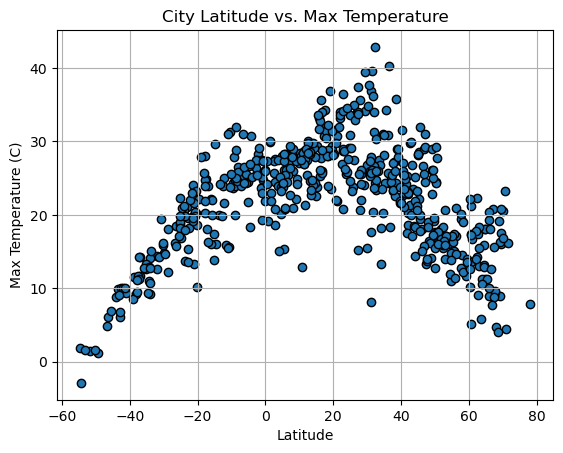

In [94]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

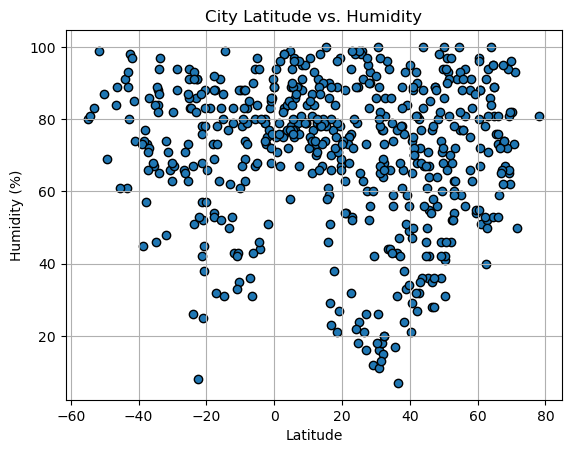

In [95]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

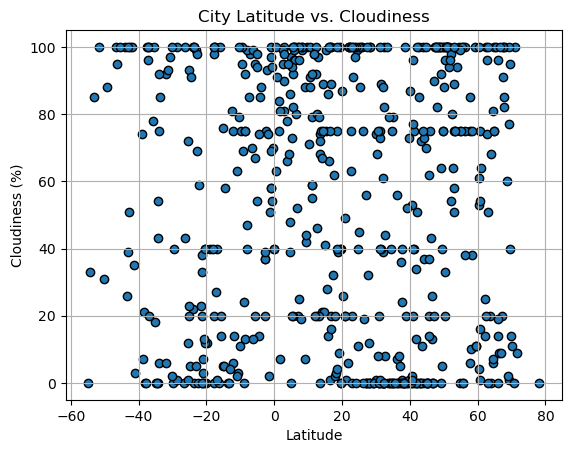

In [96]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

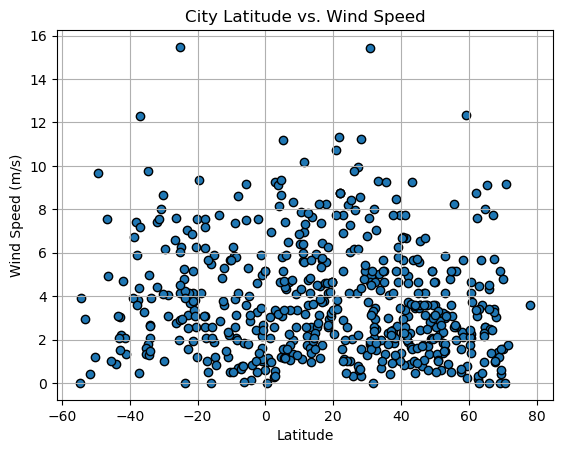

In [97]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [126]:
# Define a function to create Linear Regression plots
def linreg(x_name, x_values, y_name, y_values):
    (slope, intercept, rval, pval, std_err) = linregress(x_values, y_values)
    
    line_vals = slope * x_values + intercept
    
    eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    print(f"The r-value is: {rval}")
        
    plt.scatter(x_values, y_values)
    plt.plot(x_values, line_vals, "r-")
    
    plt.title(f"{x_name} vs {y_name}")
    plt.xlabel(str(x_name))
    plt.ylabel(str(y_name))
        
    plt.annotate(eq, (20,15), fontsize = 15, color = "red")
    
    plt.show()

In [99]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,holualoa,19.6228,-155.9522,29.32,67,0,4.63,US,1691537336
1,hawaiian paradise park,19.5933,-154.9731,28.83,69,40,4.63,US,1691537270
3,vadso,70.0744,29.7487,20.49,82,11,1.54,NO,1691537336
4,bethel,41.3712,-73.4140,24.17,70,0,6.69,US,1691537051
6,bangassou,4.7413,22.8184,20.07,99,86,1.18,CF,1691537337


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,fale old settlement,-9.3852,-171.2468,27.90,78,95,5.84,TK,1691537336
5,puerto ayora,-0.7393,-90.3518,24.75,86,54,2.68,EC,1691537337
8,placido de castro,-10.3353,-67.1856,31.32,35,79,0.51,BR,1691537337
10,blackmans bay,-43.0167,147.3167,6.07,89,39,3.03,AU,1691537338
11,puerto baquerizo moreno,-0.9000,-89.6000,23.74,76,100,4.98,EC,1691537338


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6152972853908604


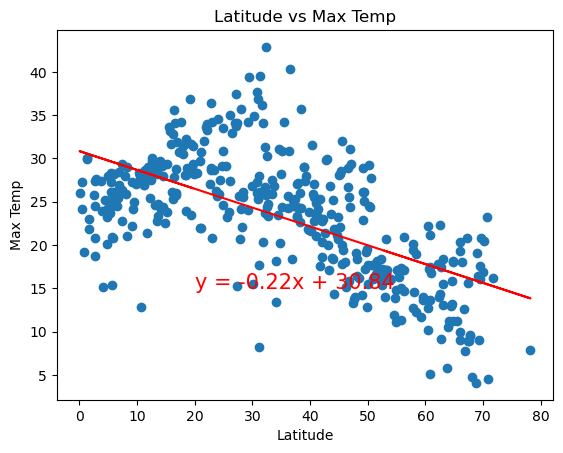

In [127]:
# Linear regression on Northern Hemisphere
linreg("Latitude", northern_hemi_df["Lat"], "Max Temp", northern_hemi_df["Max Temp"])

The r-value is: 0.8836834320069775


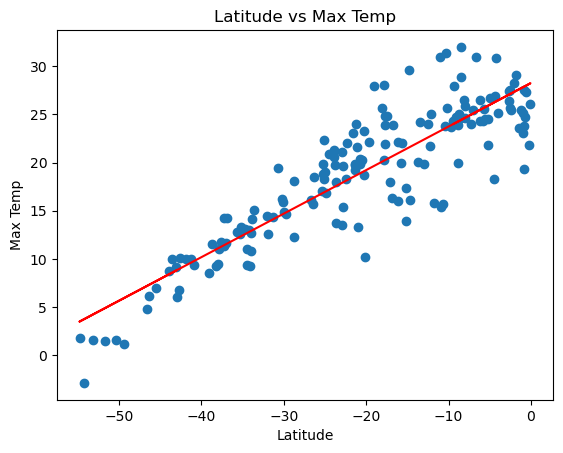

In [128]:
# Linear regression on Southern Hemisphere
linreg("Latitude", southern_hemi_df["Lat"], "Max Temp", southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.10204839143925114


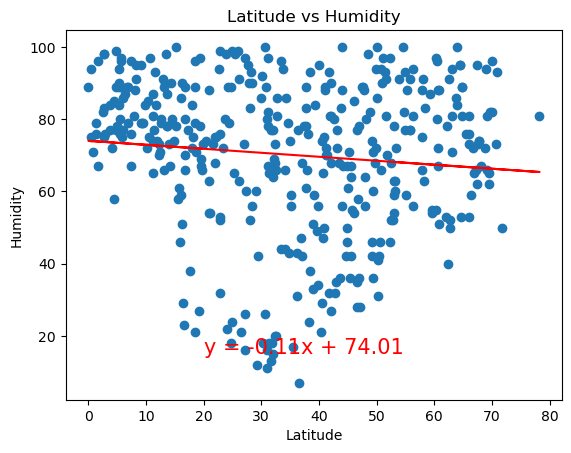

In [106]:
# Northern Hemisphere
linreg("Latitude", northern_hemi_df["Lat"], "Humidity", northern_hemi_df["Humidity"])

The r-value is: -0.1287445048901577


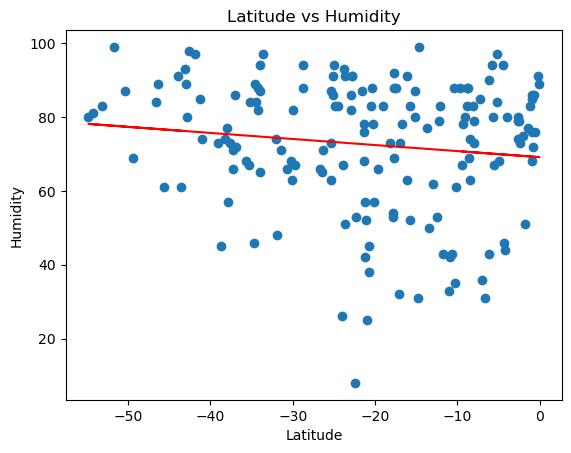

In [107]:
# Southern Hemisphere
linreg("Latitude", southern_hemi_df["Lat"], "Humidity", southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.11302304135668678


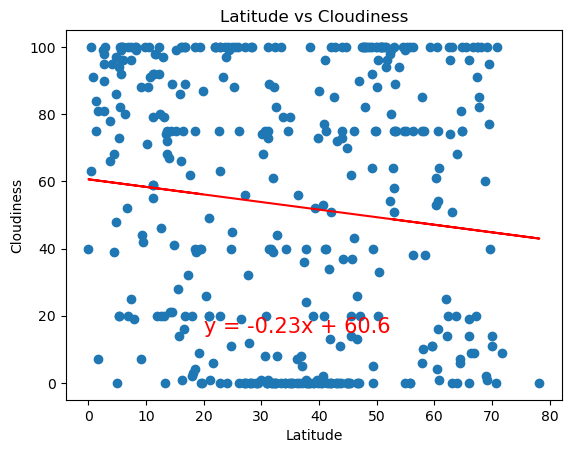

In [108]:
# Northern Hemisphere
linreg("Latitude", northern_hemi_df["Lat"], "Cloudiness", northern_hemi_df["Cloudiness"])

The r-value is: 0.007800100247470318


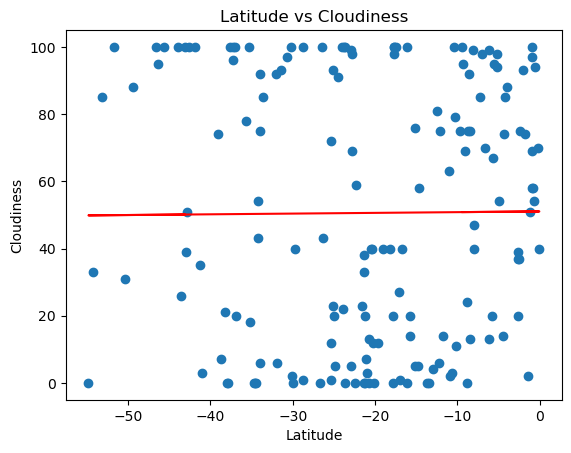

In [109]:
# Southern Hemisphere
linreg("Latitude", southern_hemi_df["Lat"], "Cloudiness", southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.18672230872981233


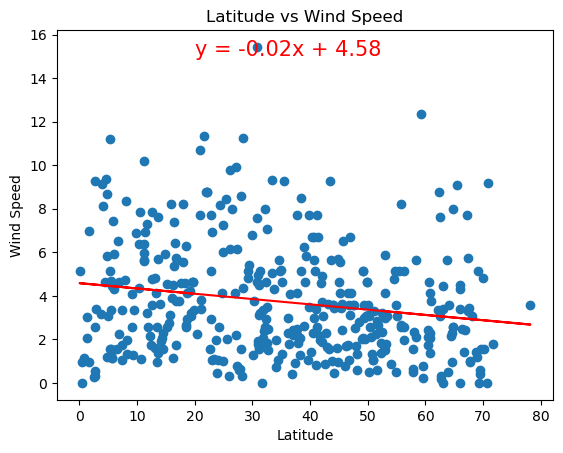

In [110]:
# Northern Hemisphere
linreg("Latitude", northern_hemi_df["Lat"], "Wind Speed", northern_hemi_df["Wind Speed"])

The r-value is: -0.10266814293113365


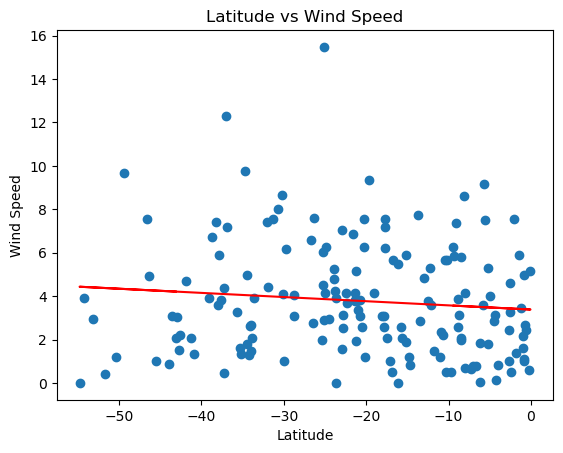

In [111]:
# Southern Hemisphere
linreg("Latitude", southern_hemi_df["Lat"], "Wind Speed", southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE